## 1. 라이브러리 호출, 데이터 불러오기

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

wind = pd.read_csv('풍력발전량.csv')
weather = pd.read_csv('기상데이터.csv')

In [37]:
wind

,일시,가시리풍력,김녕풍력,동복풍력,신창풍력,행원풍력,풍력전체
0,2022-01-01,84198.24,1803.96,44870.4,9280.62,50289.960,190443.180
1,2022-01-02,87253.92,3004.38,107424.0,7879.14,61820.940,267382.380
2,2022-01-03,165466.08,1355.76,43056.0,5874.48,45741.420,261493.740
3,2022-01-04,124738.56,4157.64,120326.4,10090.26,84647.520,343960.380
4,2022-01-05,95159.52,873.36,16502.4,14250.60,20419.740,147205.620
...,...,...,...,...,...,...,...
725,2023-12-27,25704.00,148.32,0.0,4412.70,623.940,30888.960
726,2023-12-28,58908.96,700.20,19728.0,5706.36,7559.820,92603.340
727,2023-12-29,135692.64,1560.24,43401.6,9274.68,24630.673,214559.833
728,2023-12-30,13851.36,187.02,7257.6,4978.62,1623.438,27898.038


In [38]:
weather

,날짜,지점,지점명,강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),지면온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),최저기온(°C),평균기온(°C),최고기온(°C)
0,2022.1.1,184,제주,NaN,3.12,60.99,0.66,0.99,NaN,4.83,3.21,24.97,4.82,6.94,7.63,8.60,0.1,5.04,10.9
1,2022.1.2,184,제주,0.00,3.41,66.61,0.48,0.54,NaN,4.30,3.19,16.87,5.78,7.07,7.55,8.39,-0.2,7.29,12.6
2,2022.1.3,184,제주,NaN,3.19,67.40,0.69,0.98,NaN,3.65,2.61,17.40,5.98,7.15,7.58,8.28,2.6,6.62,12.2
3,2022.1.4,184,제주,NaN,3.50,65.76,0.41,0.46,NaN,6.04,4.95,14.34,6.05,7.36,7.77,8.35,3.5,7.01,11.9
4,2022.1.5,184,제주,3.18,3.21,81.76,0.00,0.09,NaN,9.79,7.80,10.51,5.84,7.20,7.61,8.22,2.9,5.84,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023.12.27,184,제주,NaN,2.27,70.45,0.56,0.88,NaN,5.96,4.02,23.06,8.66,8.47,8.39,7.93,5.7,9.37,13.2
726,2023.12.28,184,제주,NaN,2.63,68.26,0.50,0.89,NaN,5.96,4.38,12.00,9.20,9.28,9.27,8.70,6.1,10.12,14.6
727,2023.12.29,184,제주,NaN,3.11,69.31,0.40,0.79,NaN,5.75,4.97,8.81,8.16,9.84,9.88,9.26,5.4,8.46,13.4
728,2023.12.30,184,제주,0.52,2.71,75.29,0.50,0.87,NaN,5.77,2.89,17.22,10.14,9.67,9.72,9.34,4.6,11.07,16.9


## 2. 풍력 발전량 데이터, 기상 데이터 병합

In [39]:
# 조인하기 위해 '일시'와 '날짜' 칼럼을 동일한 형식으로 변환
wind['일시'] = pd.to_datetime(wind['일시']).dt.date
weather['날짜'] = pd.to_datetime(weather['날짜']).dt.date

# 데이터프레임 조인
df = pd.merge(weather, wind, left_on='날짜', right_on='일시')

df = df.drop(columns=['일시'])

df

,날짜,지점,지점명,강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),...,30cm 지중온도(°C),최저기온(°C),평균기온(°C),최고기온(°C),가시리풍력,김녕풍력,동복풍력,신창풍력,행원풍력,풍력전체
0,2022-01-01,184,제주,NaN,3.12,60.99,0.66,0.99,NaN,4.83,...,8.60,0.1,5.04,10.9,84198.24,1803.96,44870.4,9280.62,50289.960,190443.180
1,2022-01-02,184,제주,0.00,3.41,66.61,0.48,0.54,NaN,4.30,...,8.39,-0.2,7.29,12.6,87253.92,3004.38,107424.0,7879.14,61820.940,267382.380
2,2022-01-03,184,제주,NaN,3.19,67.40,0.69,0.98,NaN,3.65,...,8.28,2.6,6.62,12.2,165466.08,1355.76,43056.0,5874.48,45741.420,261493.740
3,2022-01-04,184,제주,NaN,3.50,65.76,0.41,0.46,NaN,6.04,...,8.35,3.5,7.01,11.9,124738.56,4157.64,120326.4,10090.26,84647.520,343960.380
4,2022-01-05,184,제주,3.18,3.21,81.76,0.00,0.09,NaN,9.79,...,8.22,2.9,5.84,9.0,95159.52,873.36,16502.4,14250.60,20419.740,147205.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,184,제주,NaN,2.27,70.45,0.56,0.88,NaN,5.96,...,7.93,5.7,9.37,13.2,25704.00,148.32,0.0,4412.70,623.940,30888.960
726,2023-12-28,184,제주,NaN,2.63,68.26,0.50,0.89,NaN,5.96,...,8.70,6.1,10.12,14.6,58908.96,700.20,19728.0,5706.36,7559.820,92603.340
727,2023-12-29,184,제주,NaN,3.11,69.31,0.40,0.79,NaN,5.75,...,9.26,5.4,8.46,13.4,135692.64,1560.24,43401.6,9274.68,24630.673,214559.833
728,2023-12-30,184,제주,0.52,2.71,75.29,0.50,0.87,NaN,5.77,...,9.34,4.6,11.07,16.9,13851.36,187.02,7257.6,4978.62,1623.438,27898.038


## 3. 상관분석 진행

In [40]:
wind_columns = ['가시리풍력', '김녕풍력','동복풍력','신창풍력','행원풍력']
df = df.drop(columns=wind_columns + ['지점', '지점명'])

correlations = {}
p_values = {}

# 상관계수 및 p-value 계산
for column in df.columns:
    if column not in ['날짜', '풍력전체']:
        # NaN 값 제거
        valid_data = df[[column, '풍력전체']].dropna()
        if len(valid_data) > 1:  # 상관계수 계산을 위해 최소 2개 이상의 데이터 필요
            corr, p_val = pearsonr(valid_data[column], valid_data['풍력전체'])
            correlations[column] = corr
            p_values[column] = p_val

In [44]:
results = pd.DataFrame({
    'Correlation': correlations,
    'P-Value': p_values
})

In [41]:
# 상관계수와 p-value를 데이터프레임으로 변환
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
pval_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

## 4. 상관분석 결과 히트맵 시각화

/Users/kook/myenv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/kook/myenv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/kook/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


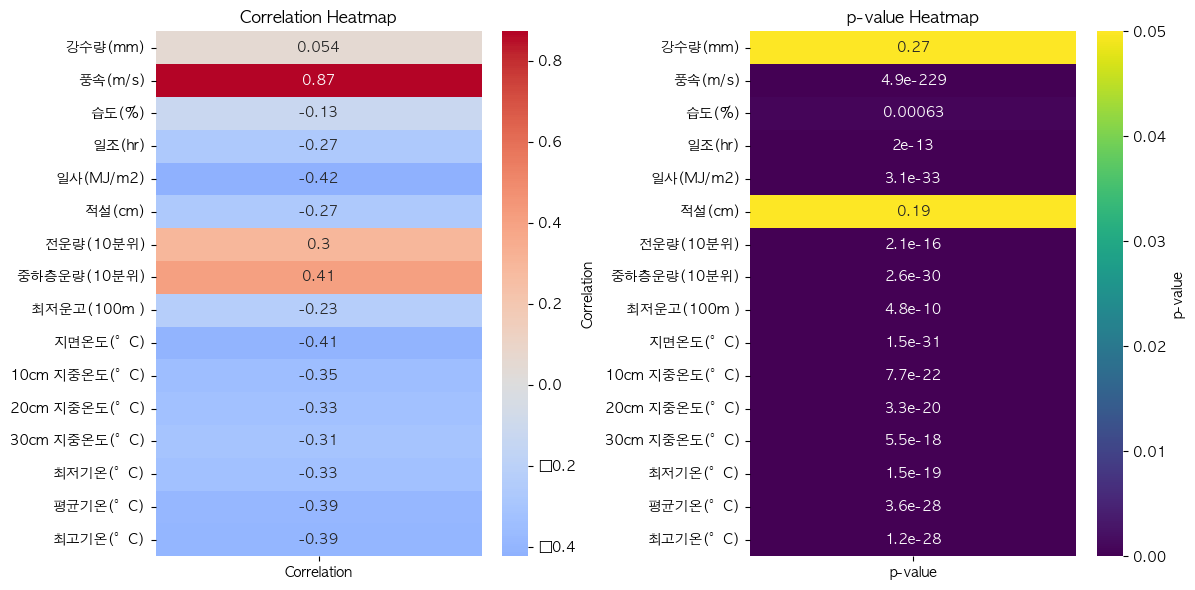

In [43]:
plt.rcParams['font.family'] = 'AppleGothic'

# 히트맵 시각화
plt.figure(figsize=(12, 6))

# 상관계수 히트맵
plt.subplot(1, 2, 1)
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')

# p-value 히트맵
plt.subplot(1, 2, 2)
sns.heatmap(pval_df, annot=True, cmap='viridis', cbar_kws={'label': 'p-value'}, norm=plt.Normalize(0, 0.05))
plt.title('p-value Heatmap')

plt.tight_layout()
plt.show()

In [45]:
results = results[(results['P-Value'] <= 0.05)]

In [46]:
results

,Correlation,P-Value
풍속(m/s),0.872853,4.884210e-229
습도(%),-0.126304,6.253091e-04
일조(hr),-0.267440,2.016363e-13
일사(MJ/m2),-0.424088,3.144709e-33
전운량(10분위),0.297775,2.055437e-16
중하층운량(10분위),0.405831,2.571808e-30
최저운고(100m ),-0.229418,4.841542e-10
지면온도(°C),-0.413720,1.491741e-31
10cm 지중온도(°C),-0.345067,7.708880e-22
20cm 지중온도(°C),-0.331717,3.287086e-20


In [49]:
significant_results = results[(results['Correlation'].abs() >= 0.4)]

In [50]:
significant_results

,Correlation,P-Value
풍속(m/s),0.872853,4.884210e-229
일사(MJ/m2),-0.424088,3.144709e-33
중하층운량(10분위),0.405831,2.571808e-30
지면온도(°C),-0.413720,1.491741e-31


- p-value 값이 유의미하고 상관계수도 절댓값 0.4 이상인 기상 컬럼(0.5로 할 시 풍속 밖에 나오지 않아서 0.4로 조정)
    - 풍속, 일사, 증하층운량, 지면온도